# 3. Dataset Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

df = pd.read_csv('../../data/normalized_tweets.csv')
df.head()

,tweet_text,cyberbullying_type
0,In words katandandre food crapilicious,not_cyberbullying
1,Why aussietv white,not_cyberbullying
2,classy whore Or red velvet cupcakes,not_cyberbullying
3,meh thanks heads concerned another angry dud...,not_cyberbullying
4,This ISIS account pretending Kurdish account ...,not_cyberbullying


Check null values

In [2]:
df.isnull().sum()       # No null values

tweet_text            0
cyberbullying_type    0
dtype: int64

Compute the average length of tweets

In [3]:
avg_len_tweet = round(df['tweet_text'].apply(len).mean(), 2)
avg_len_tweet

88.77

Analyze different cyberbullying types

In [4]:
df['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7996
age                    7992
ethnicity              7958
gender                 7906
not_cyberbullying      7816
other_cyberbullying    7613
Name: count, dtype: int64

In [5]:
cyberbullying_types = df['cyberbullying_type'].unique()
cyt_values = list(df['cyberbullying_type'].value_counts())

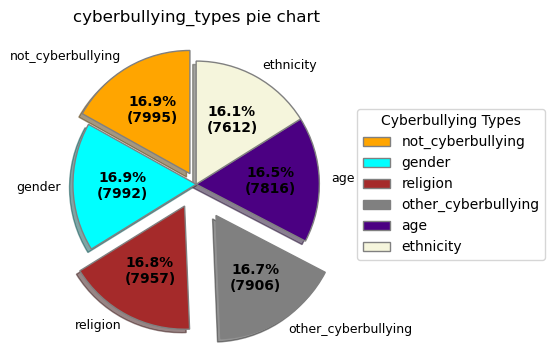

In [6]:
# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)
 
# Creating color parameters
colors = ("orange", "cyan", "brown",
          "grey", "indigo", "beige")
 
# Wedge properties
wp = {'linewidth': 1, 'edgecolor': "grey"}
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
 
# Creating plot
fig, ax = plt.subplots(figsize=(4, 4))
wedges, texts, autotexts = ax.pie(cyt_values,
                                  autopct=lambda pct: func(pct, cyt_values),
                                  explode=explode,
                                  labels=cyberbullying_types,
                                  shadow=True,
                                  colors=colors,
                                  startangle=90,
                                  wedgeprops=wp,
                                  #textprops=dict(color="black")
                                  textprops = {'fontsize': 9}
                                 )
 
# Adding legend
ax.legend(wedges, cyberbullying_types,
          title="Cyberbullying Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
 
plt.setp(autotexts, size=10, weight="bold")
ax.set_title("cyberbullying_types pie chart")
 
# show plot
plt.show()

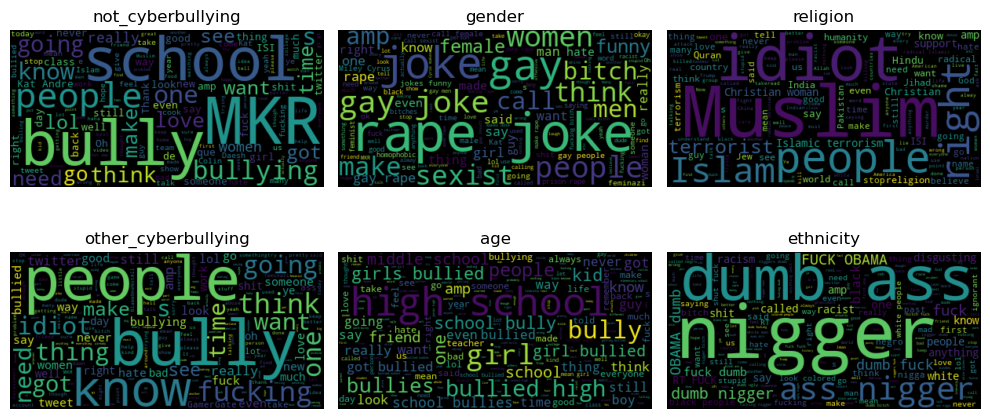

In [7]:
plt.figure(figsize=(10, 5))

# For each cyberbullying type:
for i in range (len(cyberbullying_types)):
    tweets = df[df['cyberbullying_type'] == cyberbullying_types[i]]
    
    # Concatenates all tweets into a single string using space as separator 
    text = tweets['tweet_text'].map('{} '.format).sum()               

    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    plt.subplot(2, 3, i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(cyberbullying_types[i])

plt.tight_layout()
plt.show()